In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

In [2]:
!curl -O https://lazyprogrammer.me/course_files/sp500sub.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  1 24.2M    1  318k    0     0   135k      0  0:03:03  0:00:02  0:03:01  135k
  9 24.2M    9 2302k    0     0   695k      0  0:00:35  0:00:03  0:00:32  695k
 24 24.2M   24 6206k    0     0  1440k      0  0:00:17  0:00:04  0:00:13 1440k
 40 24.2M   40  9.8M    0     0  1895k      0  0:00:13  0:00:05  0:00:08 2052k
 56 24.2M   56 13.6M    0     0  2218k      0  0:00:11  0:00:06  0:00:05 2874k
 66 24.2M   66 16.1M    0     0  2265k      0  0:00:10  0:00:07  0:00:03 3274k
 82 24.2M   82 20.0M    0     0  2473k      0  0:00:10  0:00:08  0:00:02 3651k
 98 24.2M   98 23.9M    0     0  2636k      0  0:00

In [3]:
df=pd.read_csv('sp500sub.csv',index_col='Date',parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.22,9.51,9.17,9.50,9.50,1865400.0,INCY
2010-01-05,9.51,10.29,9.45,10.27,10.27,7608900.0,INCY
2010-01-06,10.38,11.09,10.35,11.00,11.00,8046700.0,INCY
2010-01-07,11.00,11.06,10.62,10.82,10.82,3680300.0,INCY
2010-01-08,10.82,11.00,10.75,10.94,10.94,1529300.0,INCY


In [4]:
goog=df[df['Name']=='GOOG'][['Close']].copy()

In [16]:
def log_ret(price):
    log_price=np.log(price)
    return log_price.diff()

In [17]:
goog['LogRet']=log_ret(goog['Close'])
goog.head()

,Close,LogRet
Date,,
2010-01-04,312.204773,NaN
2010-01-05,310.829926,-0.004413
2010-01-06,302.994293,-0.025532
2010-01-07,295.940735,-0.023555
2010-01-08,299.885956,0.013243


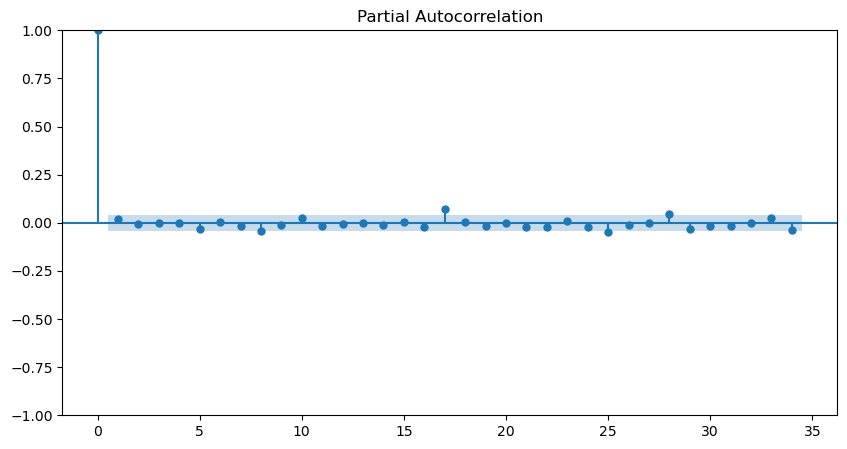

In [22]:
fig,ax=plt.subplots(figsize=(10,5))
plot_pacf(goog['LogRet'].dropna(),ax=ax);

In [ ]:
p=0, there is no autocorrelation

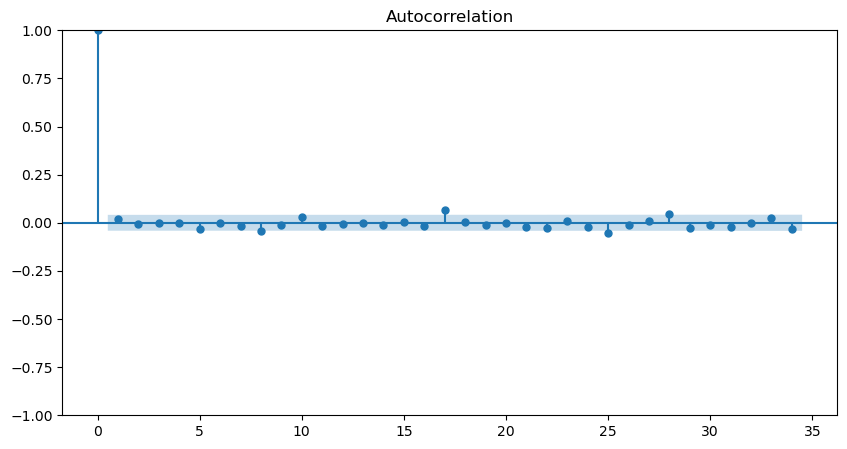

In [23]:
fig,ax=plt.subplots(figsize=(10,5))
plot_acf(goog['LogRet'].dropna(),ax=ax);

In [ ]:
q=0, as there is no autocorrelation so the arima model is (0,1,0)

In [ ]:
# there is hardly any autocorrelation 

In [24]:
aapl=df[df['Name']=='AAPL'][['Close']].copy()

In [25]:
aapl['LogRet']=log_ret(aapl['Close'])
aapl.head()

,Close,LogRet
Date,,
2010-01-04,30.572857,NaN
2010-01-05,30.625713,0.001727
2010-01-06,30.138571,-0.016034
2010-01-07,30.082857,-0.001850
2010-01-08,30.282858,0.006626


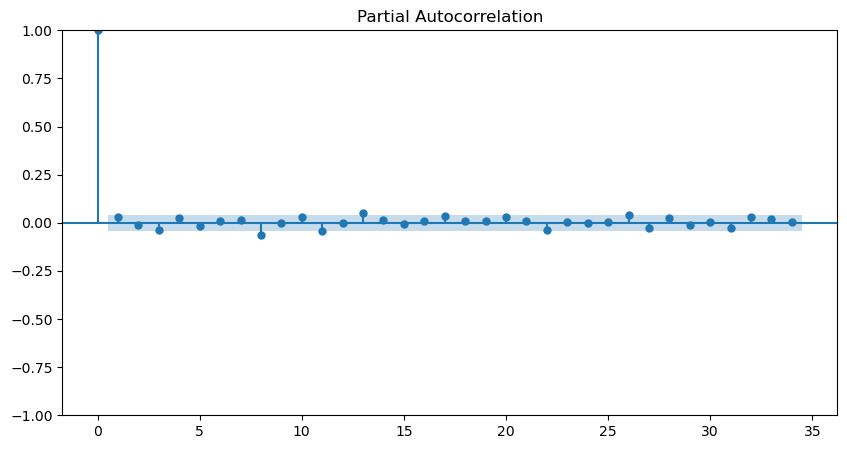

In [28]:
fig,ax=plt.subplots(figsize=(10,5))
plot_pacf(aapl['LogRet'].dropna(),ax=ax);

In [27]:
# p = 0, there is no autocorrelation

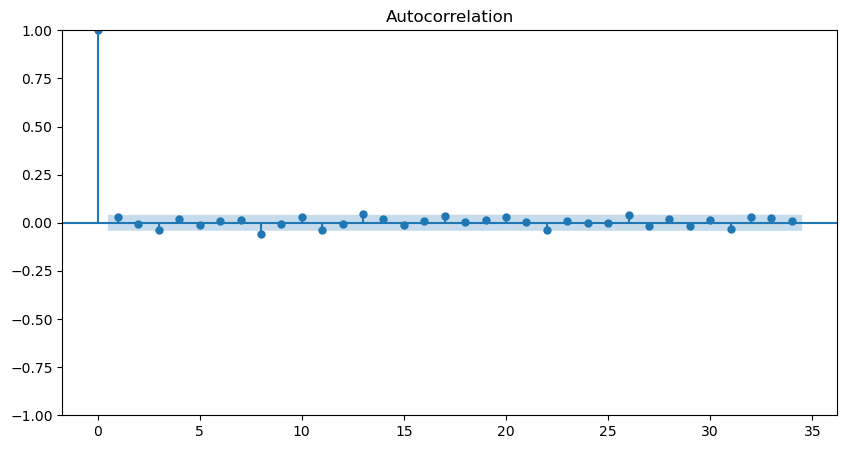

In [29]:
fig,ax=plt.subplots(figsize=(10,5))
plot_acf(aapl['LogRet'].dropna(),ax=ax);

In [30]:
# q = 0, there is no autocorrelation

In [31]:
ibm=df[df['Name']=='IBM'][['Close']].copy()

In [32]:
ibm['LogRet']=log_ret(ibm['Close'])
ibm.head()

,Close,LogRet
Date,,
2010-01-04,132.449997,NaN
2010-01-05,130.850006,-0.012154
2010-01-06,130.000000,-0.006517
2010-01-07,129.550003,-0.003468
2010-01-08,130.850006,0.009985


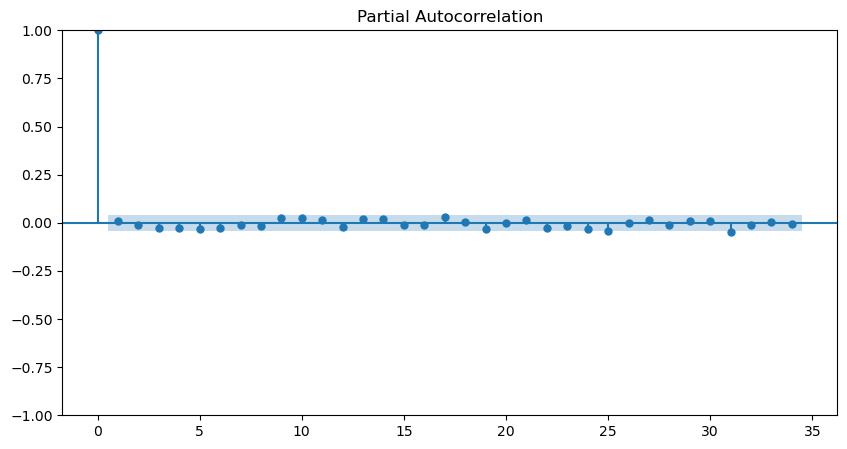

In [33]:
fig,ax=plt.subplots(figsize=(10,5))
plot_pacf(ibm['LogRet'].dropna(),ax=ax);

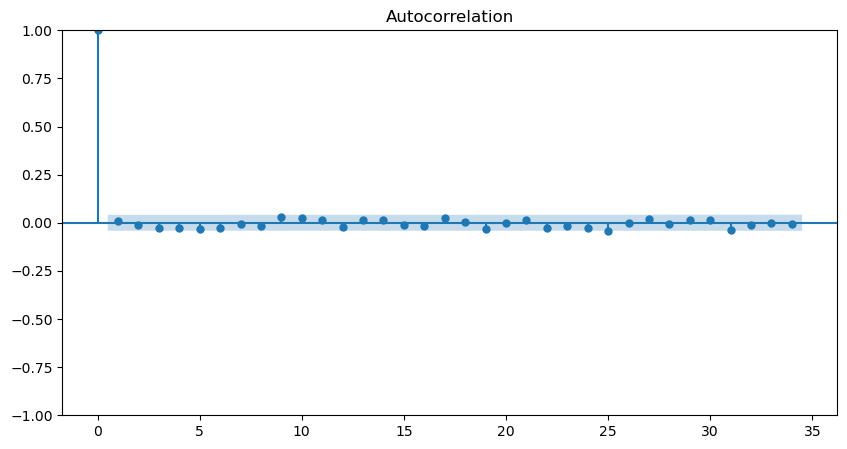

In [34]:
# p=0
fig,ax=plt.subplots(figsize=(10,5))
plot_acf(ibm['LogRet'].dropna(),ax=ax);

In [35]:
# again q is also equal to zero so pdq is 010

In [36]:
sbux=df[df['Name']=='SBUX'][['Close']].copy()

In [37]:
sbux['LogRet']=log_ret(sbux['Close'])
ibm.head()

,Close,LogRet
Date,,
2010-01-04,132.449997,NaN
2010-01-05,130.850006,-0.012154
2010-01-06,130.000000,-0.006517
2010-01-07,129.550003,-0.003468
2010-01-08,130.850006,0.009985


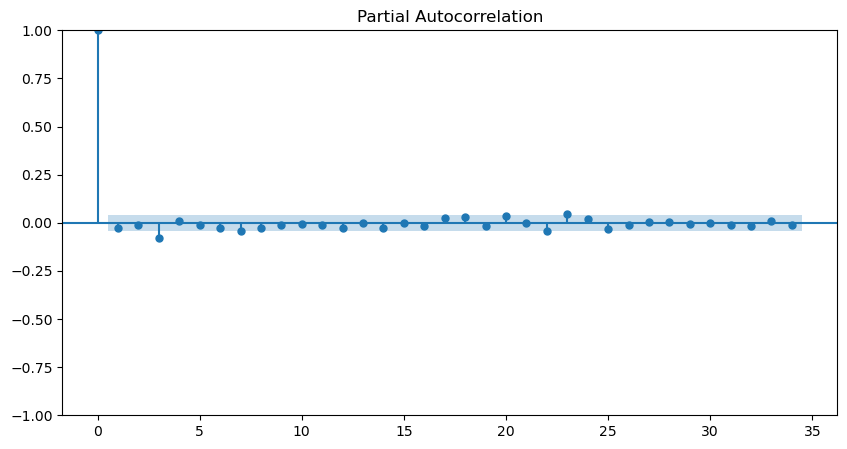

In [38]:
fig,ax=plt.subplots(figsize=(10,5))
plot_pacf(sbux['LogRet'].dropna(),ax=ax);

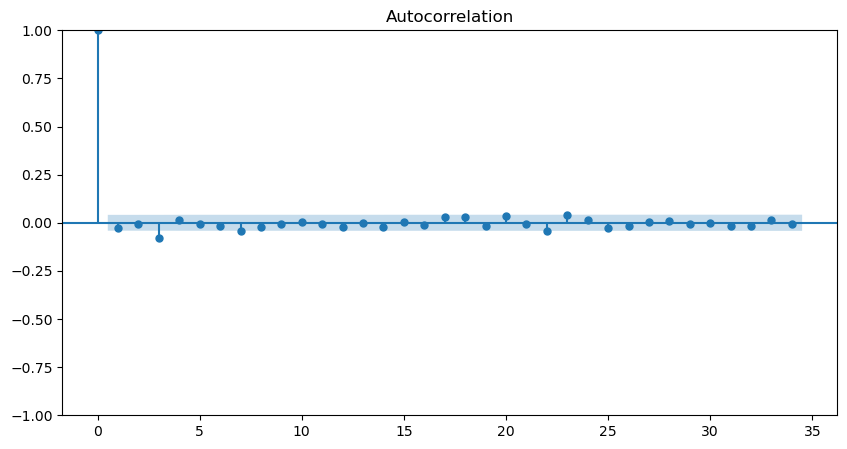

In [39]:
p=0
fig,ax=plt.subplots(figsize=(10,5))
plot_acf(sbux['LogRet'].dropna(),ax=ax);

In [40]:
#q=0 so order is 010 or random walk